## Age and Gender Detection System. 

### In this project, we will be performing both classification and regression to predict both gender and age respectively.

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/Projects/CodeClause Projects/Age and Gender Detection System/UTKFace.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [3]:
BASE_DIR = r'C:\Users\bhavi\Downloads\archive (4)\utkface_aligned_cropped\UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])


  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [5]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [6]:
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

image_path  age  gender
0  C:\Users\bhavi\Downloads\archive (4)\utkface_a...   30       0
1  C:\Users\bhavi\Downloads\archive (4)\utkface_a...   25       1
2  C:\Users\bhavi\Downloads\archive (4)\utkface_a...   35       1
3  C:\Users\bhavi\Downloads\archive (4)\utkface_a...   26       1
4  C:\Users\bhavi\Downloads\archive (4)\utkface_a...   36       1

## Exploratory Data Anlysis

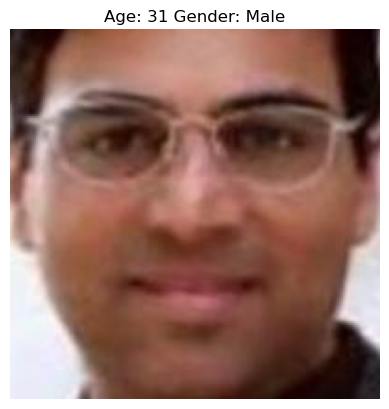

In [7]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

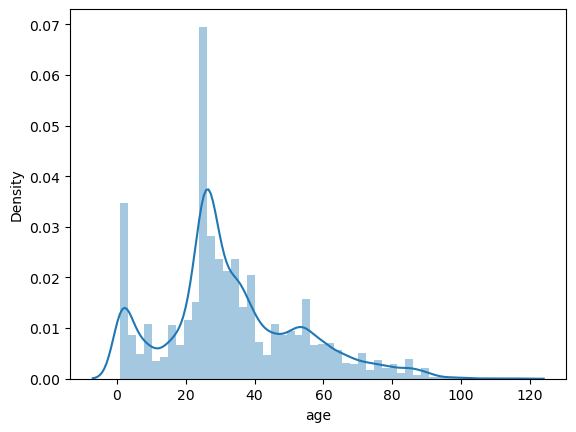

In [8]:

 sns.distplot(df['age'])

The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 120 years. There are some outliers at the higher end of the distribution.

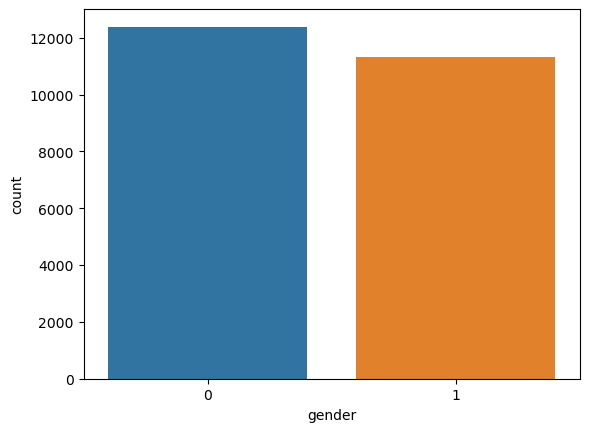

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='gender')
plt.show()


In [10]:
print(df['gender'].value_counts())


0    12391
1    11317
Name: gender, dtype: int64


The number of samples for females are slightly higher than that of males. However, the dataset is not highly imbalanced.

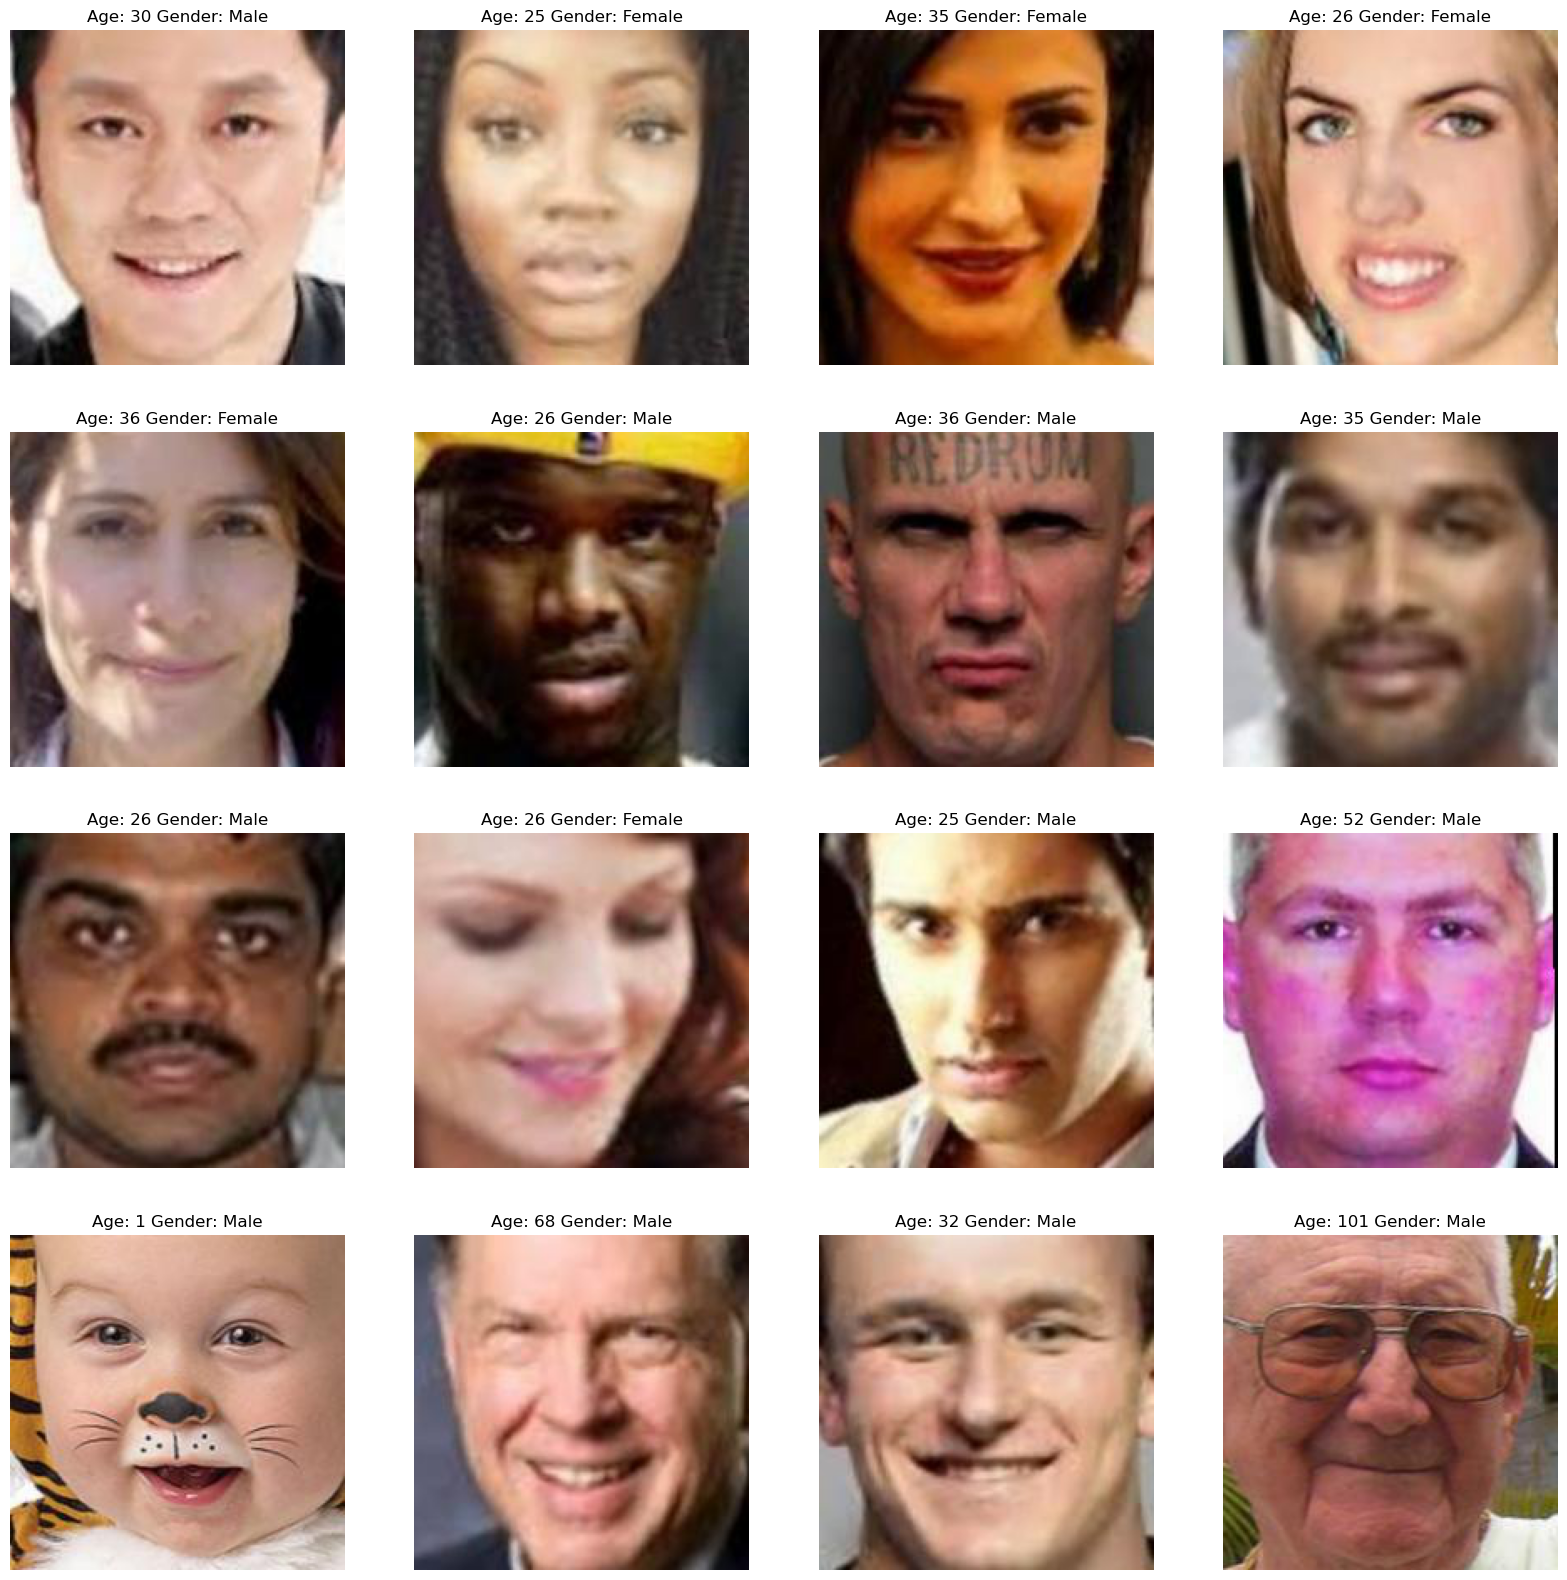

In [11]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

## Feature Extraction

In [12]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [13]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [14]:
X.shape

(23708, 128, 128, 1)

In [15]:
X = X / 255.0

In [16]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42
)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_gender_train shape: {y_gender_train.shape}')
print(f'y_gender_test shape: {y_gender_test.shape}')
print(f'y_age_train shape: {y_age_train.shape}')
print(f'y_age_test shape: {y_age_test.shape}')

X_train shape: (18966, 128, 128, 1)
X_test shape: (4742, 128, 128, 1)
y_gender_train shape: (18966,)
y_gender_test shape: (4742,)
y_age_train shape: (18966,)
y_age_test shape: (4742,)


In [18]:
input_shape = (128, 128, 1)

In [19]:
inputs = Input(shape=input_shape)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)


dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

modelf = Model(inputs=[inputs], outputs=[output_1, output_2])

modelf.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=[['accuracy'], ['mae']])

modelf.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 126, 126, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 63, 63, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 61, 61, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 30, 30, 64)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 28, 28, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 14, 14, 128)       │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 12, 12, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 9216)              │               0 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │       2,359,552 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │       2,359,552 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 256)               │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_out (Dense)            │ (None, 1)                 │             257 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_out (Dense)               │ (None, 1)                 │             25

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = modelf.fit(x=X_train, y=[y_gender_train, y_age_train],
                    batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 128s 262ms/step - age_out_mae: 16.6876 - gender_out_accuracy: 0.5142 - loss: 17.4260 - val_age_out_mae: 14.2886 - val_gender_out_accuracy: 0.4892 - val_loss: 14.9795
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 123s 258ms/step - age_out_mae: 13.6788 - gender_out_accuracy: 0.6414 - loss: 14.2988 - val_age_out_mae: 11.1714 - val_gender_out_accuracy: 0.7812 - val_loss: 11.6290
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 124s 261ms/step - age_out_mae: 10.6984 - gender_out_accuracy: 0.7811 - loss: 11.1631 - val_age_out_mae: 9.5047 - val_gender_out_accuracy: 0.8166 - val_loss: 9.8966
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 122s 257ms/step - age_out_mae: 9.6541 - gender_out_accuracy: 0.8138 - loss: 10.0601 - val_age_out_mae: 8.8007 - val_gender_out_accuracy: 0.8374 - val_loss: 9.1512
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 128s 270ms/step - age_out_mae: 8.7361 - gender_out_accuracy: 0.8312 - loss: 9.1072 - val_age_out_mae: 8.7896 - val_gender_out_accuracy: 0.849

## Plot Results

In [22]:
import pickle

modelf.save('modelf.h5')

# Save the history
with open('historyf.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# If you want to also save the training configuration
config = {
    'batch_size': 32,
    'epochs': 50,
    'validation_split': 0.2
}

with open('config.pkl', 'wb') as f:
    pickle.dump(config, f)


## Predicting Test Data

In [20]:
def get_image_features(image):
  img = load_img(image, color_mode='grayscale')
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

In [52]:
model.save("model.h5")

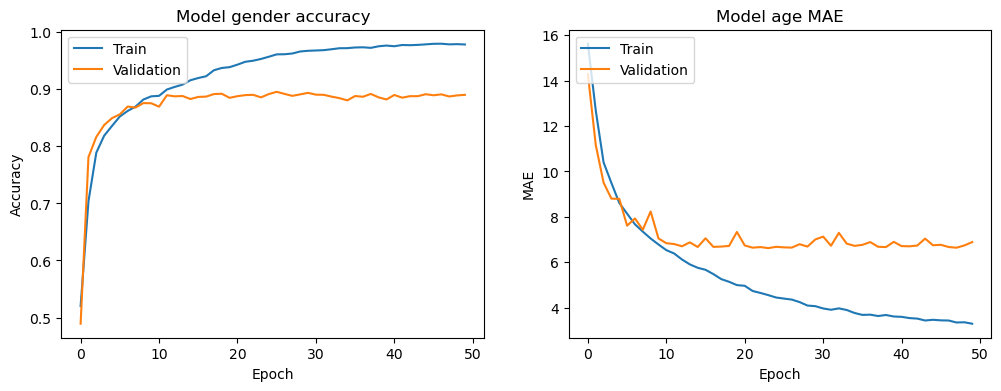

In [30]:
import matplotlib.pyplot as plt
with open('historyf.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Gender accuracy
plt.subplot(1, 2, 1)
plt.plot(history['gender_out_accuracy'])
plt.plot(history['val_gender_out_accuracy'])
plt.title('Model gender accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Age MAE
plt.subplot(1, 2, 2)
plt.plot(history['age_out_mae'])
plt.plot(history['val_age_out_mae'])
plt.title('Model age MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


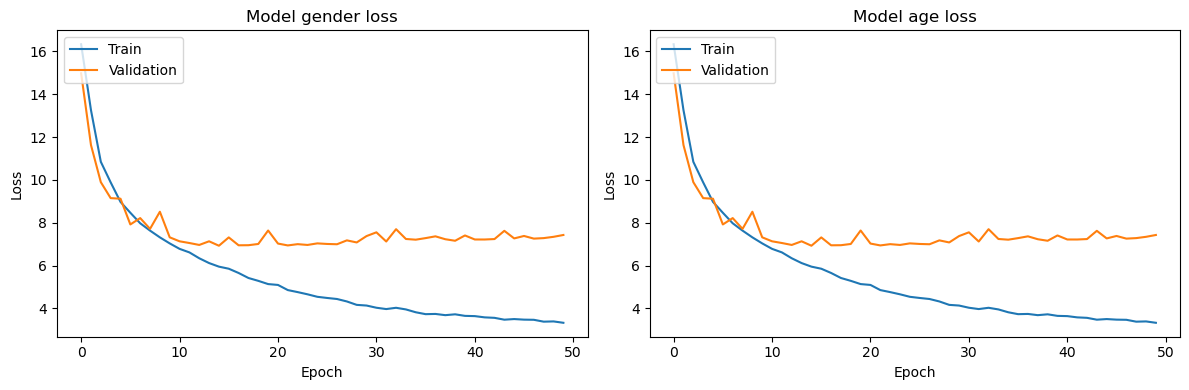

In [31]:
import matplotlib.pyplot as plt

# Load the history
with open('historyf.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

# Gender loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model gender loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Age loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model age loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


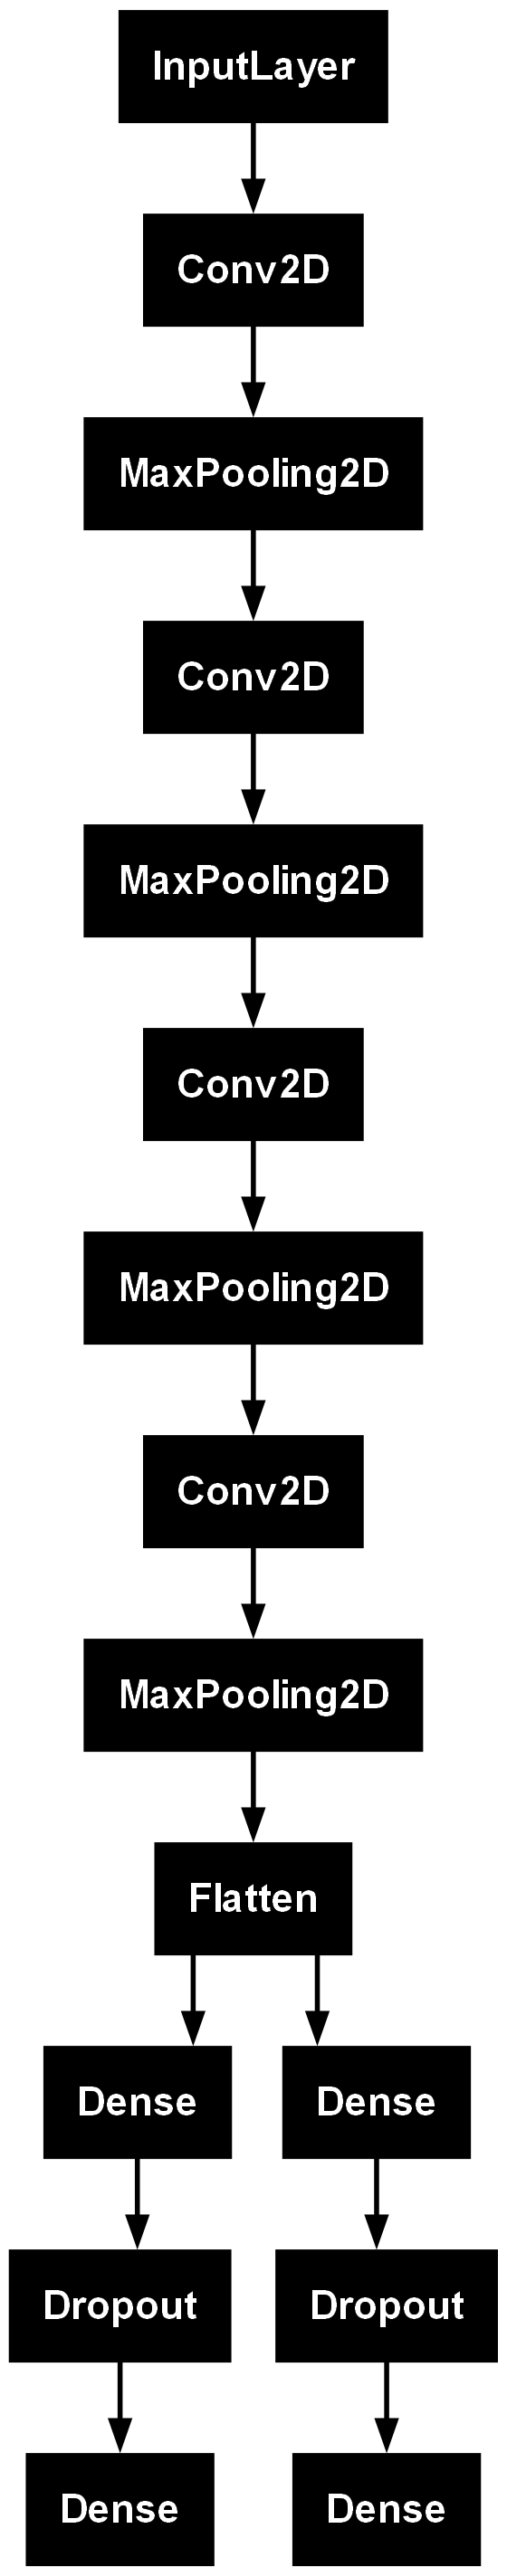

In [2]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
model = load_model('model.h5')
plot_model(model)

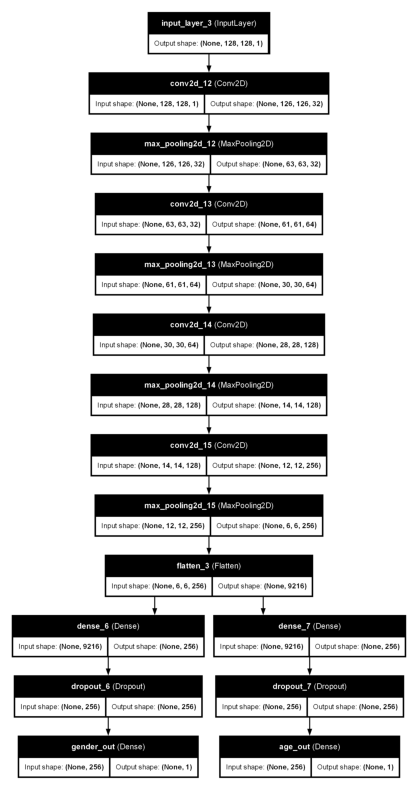

In [3]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the model
model = load_model('model.h5')

# Save the plot to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the image
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image 1: True Age: 3, Predicted Age: 1
Image 2: True Age: 15, Predicted Age: 16
Image 3: True Age: 60, Predicted Age: 56
Image 4: True Age: 35, Predicted Age: 34
Image 5: True Age: 1, Predicted Age: 2
Image 6: True Age: 4, Predicted Age: 2
Image 7: True Age: 16, Predicted Age: 23
Image 8: True Age: 96, Predicted Age: 78
Image 9: True Age: 53, Predicted Age: 50
Image 10: True Age: 25, Predicted Age: 23
Image 11: True Age: 24, Predicted Age: 23
Image 12: True Age: 100, Predicted Age: 65
Image 13: True Age: 2, Predicted Age: 0
Image 14: True Age: 42, Predicted Age: 34
Image 15: True Age: 19, Predicted Age: 28
Image 16: True Age: 33, Predicted Age: 28
Image 17: True Age: 26, Predicted Age: 25
Image 18: True Age: 36, Predicted Age: 39
Image 19: True Age: 26, Predicted Age: 29
Image 20: True Age: 31, Predicted Age: 32
Image 21: True Age: 76, Predicted Age: 57
Image 22: True Age: 54, Predicted Age: 46
Image 23: True Age: 31, Predicted Age: 25
Image 24: Tr

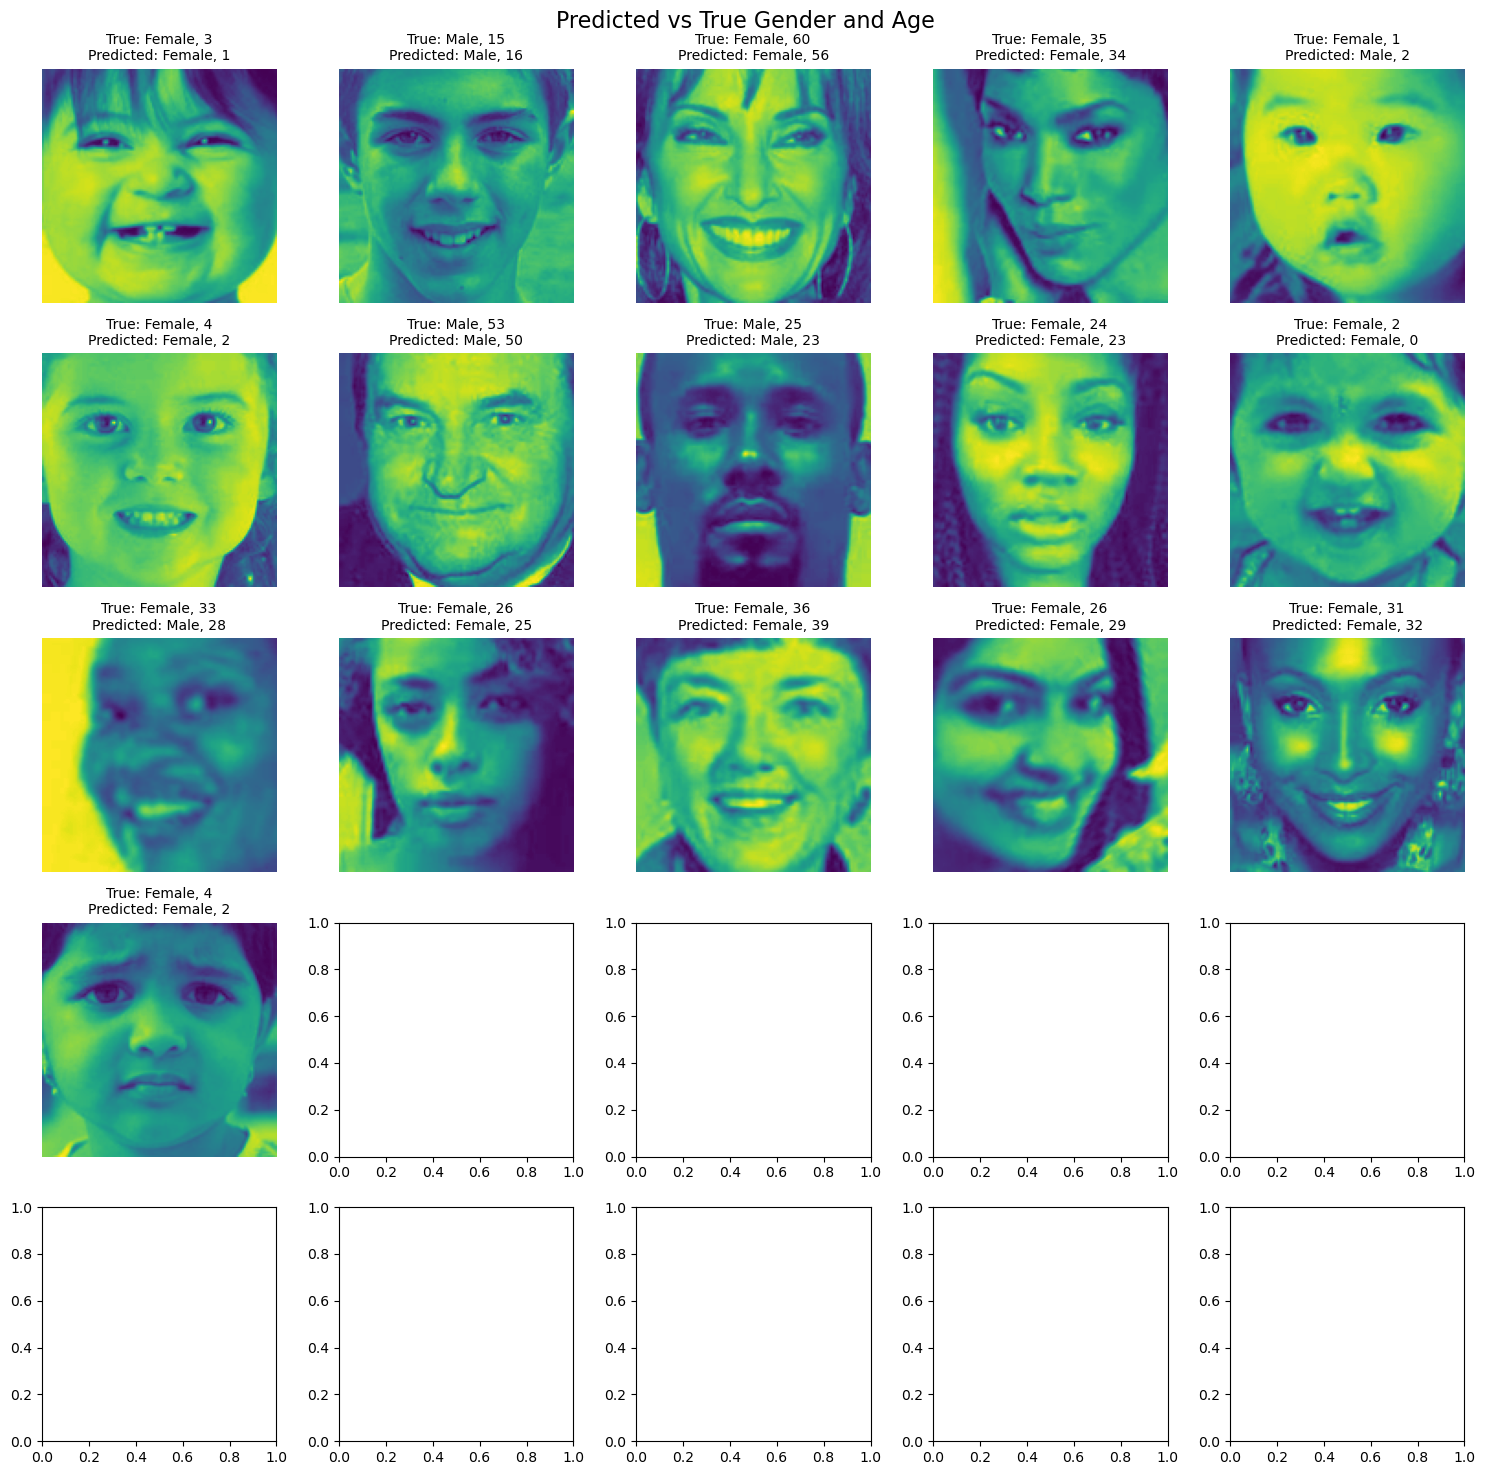

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Number of random images to display
num_images = 25 # Displaying 25 images in a 5x5 grid

# Select random indices from the test set
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)
random_images = X_test[random_indices]
random_gender_labels = y_gender_test[random_indices]
random_age_labels = y_age_test[random_indices]

# Predict gender and age for the selected images
predictions_gender, predictions_age = model1.predict(random_images)

# Assuming 'gender_mapping' is defined as before
gender_mapping = {0: 'Male', 1: 'Female'}

# Plotting images and printing details
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid with larger figure size
fig.suptitle('Predicted vs True Gender and Age', fontsize=16)

# Counter for images meeting the condition
displayed_images = 0

for i in range(num_images):
    predicted_gender = gender_mapping[int(np.round(predictions_gender[i][0]))]
    predicted_age = int(np.round(predictions_age[i][0]))
    true_gender = gender_mapping[int(random_gender_labels[i])]
    true_age = int(random_age_labels[i])
    
    # Print true and predicted age for each image
    print(f"Image {i+1}: True Age: {true_age}, Predicted Age: {predicted_age}")
    
    # Print only if the absolute difference in age is exactly 5
    if abs(predicted_age - true_age) <= 5:
        ax = axes[displayed_images // 5, displayed_images % 5]
        ax.imshow(array_to_img(random_images[i]))
        ax.axis('off')
        ax.set_title(f'True: {true_gender}, {true_age}\nPredicted: {predicted_gender}, {predicted_age}', fontsize=10)
        displayed_images += 1

plt.tight_layout()
plt.show()


In [51]:
# Print out the metrics names to check their exact names
print("Metrics Names:", model1.metrics_names)


Metrics Names: ['loss', 'compile_metrics']


In [54]:
total_loss = test_results[0]  # Overall test loss

# Extract gender accuracy and age MAE from test_results
gender_accuracy = test_results[2]  # Accuracy for gender prediction
age_mae = test_results[1]  # Mean Absolute Error for age prediction

# Convert accuracy to percentage
accuracy_percentage = gender_accuracy * 100

print(f"Total Loss: {total_loss:.4f}")
print(f"Gender Accuracy: {accuracy_percentage:.2f}%")
print(f"Age Mean Absolute Error: {age_mae:.4f}")


Total Loss: 7.5147
Gender Accuracy: 88.51%
Age Mean Absolute Error: 6.9174


In [69]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_gender_train shape:", y_gender_train.shape)
print("y_gender_test shape:", y_gender_test.shape)
print("y_age_train shape:", y_age_train.shape)
print("y_age_test shape:", y_age_test.shape)


X_train shape: (18966, 128, 128, 1)
X_test shape: (4742, 128, 128, 1)
y_gender_train shape: (18966,)
y_gender_test shape: (4742,)
y_age_train shape: (18966,)
y_age_test shape: (4742,)


In [73]:
print("Shape of y_age_test:", y_age_test.shape)
print("Shape of predicted_age_classes:", predicted_age_classes.shape)


Shape of y_age_test: (4742,)
Shape of predicted_age_classes: (25,)


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming predicted_age_classes is correctly computed with predictions
# Ensure predicted_age_classes matches the shape and order of y_age_test

# Example:
# Compute predictions for all X_test
predictions = model1.predict(X_test)
predicted_gender_classes = np.round(predictions[0]).flatten()
predicted_age_classes = np.round(predictions[1]).flatten().astype(int)

# Ensure predicted_age_classes has the same shape as y_age_test
print("Shape of y_age_test:", y_age_test.shape)
print("Shape of predicted_age_classes:", predicted_age_classes.shape)

# Compute confusion matrix
conf_matrix_age = confusion_matrix(y_age_test, predicted_age_classes)
print("Confusion Matrix (Age):")
print(conf_matrix_age)

# Classification report for age prediction
print("Age Classification Report:")
print(classification_report(y_age_test, predicted_age_classes))


149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step
Shape of y_age_test: (4742,)
Shape of predicted_age_classes: (4742,)
Confusion Matrix (Age):
[[  0   0   0 ...   0   0   0]
 [ 32  10 168 ...   0   0   0]
 [ 10   3  63 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Age Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.53      0.04      0.08       239
           2       0.22      0.61      0.32       103
           3       0.18      0.15      0.17        71
           4       0.26      0.16      0.20        64
           5       0.08      0.05      0.06        38
           6       0.04      0.04      0.04        26
           7       0.04      0.03      0.04        30
           8       0.27      0.12      0.17        50
           9       0.04      0.03      0.04        31
          10       0.08      0.06      0.07        

In [76]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Example: Assuming predicted_gender_classes and y_gender_test are defined correctly

# Compute accuracy
accuracy = accuracy_score(y_gender_test, predicted_gender_classes)
print(f'Accuracy: {accuracy:.4f}')

# Compute precision, recall, and F1-score
precision = precision_score(y_gender_test, predicted_gender_classes)
recall = recall_score(y_gender_test, predicted_gender_classes)
f1 = f1_score(y_gender_test, predicted_gender_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Classification report
print('\nClassification Report (Gender):')
print(classification_report(y_gender_test, predicted_gender_classes))
    

Accuracy: 0.8851
Precision: 0.8597
Recall: 0.9005
F1-score: 0.8797

Classification Report (Gender):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2530
           1       0.86      0.90      0.88      2212

    accuracy                           0.89      4742
   macro avg       0.88      0.89      0.88      4742
weighted avg       0.89      0.89      0.89      4742



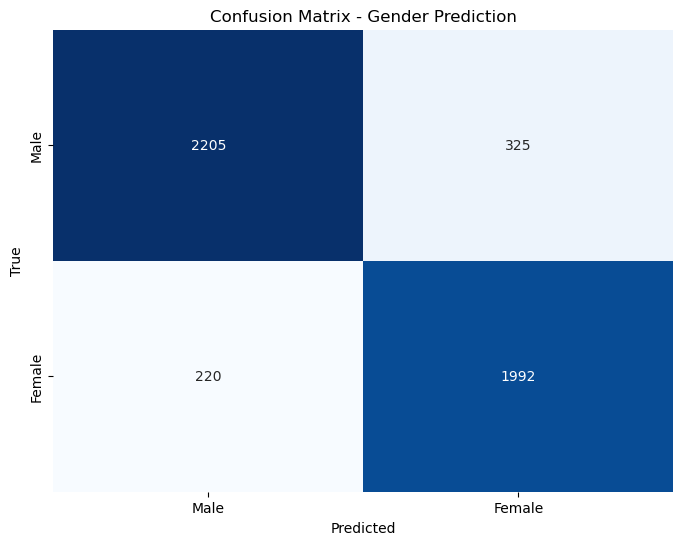

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming predicted_gender_classes and y_gender_test are defined correctly

# Compute confusion matrix
conf_matrix_gender = confusion_matrix(y_gender_test, predicted_gender_classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gender, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gender Prediction')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Image 1: True Age: 27, Predicted Age: 34
Image 2: True Age: 28, Predicted Age: 18
Image 3: True Age: 60, Predicted Age: 33
Image 4: True Age: 26, Predicted Age: 37
Image 5: True Age: 22, Predicted Age: 15
Image 6: True Age: 21, Predicted Age: 23
Image 7: True Age: 1, Predicted Age: 2
Image 8: True Age: 25, Predicted Age: 26
Image 9: True Age: 58, Predicted Age: 58
Image 10: True Age: 26, Predicted Age: 25
Image 11: True Age: 35, Predicted Age: 32
Image 12: True Age: 30, Predicted Age: 28
Image 13: True Age: 77, Predicted Age: 36
Image 14: True Age: 54, Predicted Age: 32
Image 15: True Age: 8, Predicted Age: 4
Image 16: True Age: 27, Predicted Age: 23
Image 17: True Age: 27, Predicted Age: 25
Image 18: True Age: 67, Predicted Age: 66
Image 19: True Age: 26, Predicted Age: 37
Image 20: True Age: 61, Predicted Age: 52
Image 21: True Age: 28, Predicted Age: 48
Image 22: True Age: 60, Predicted Age: 43
Image 23: True Age: 16, Predicted Age: 22
Image 24:

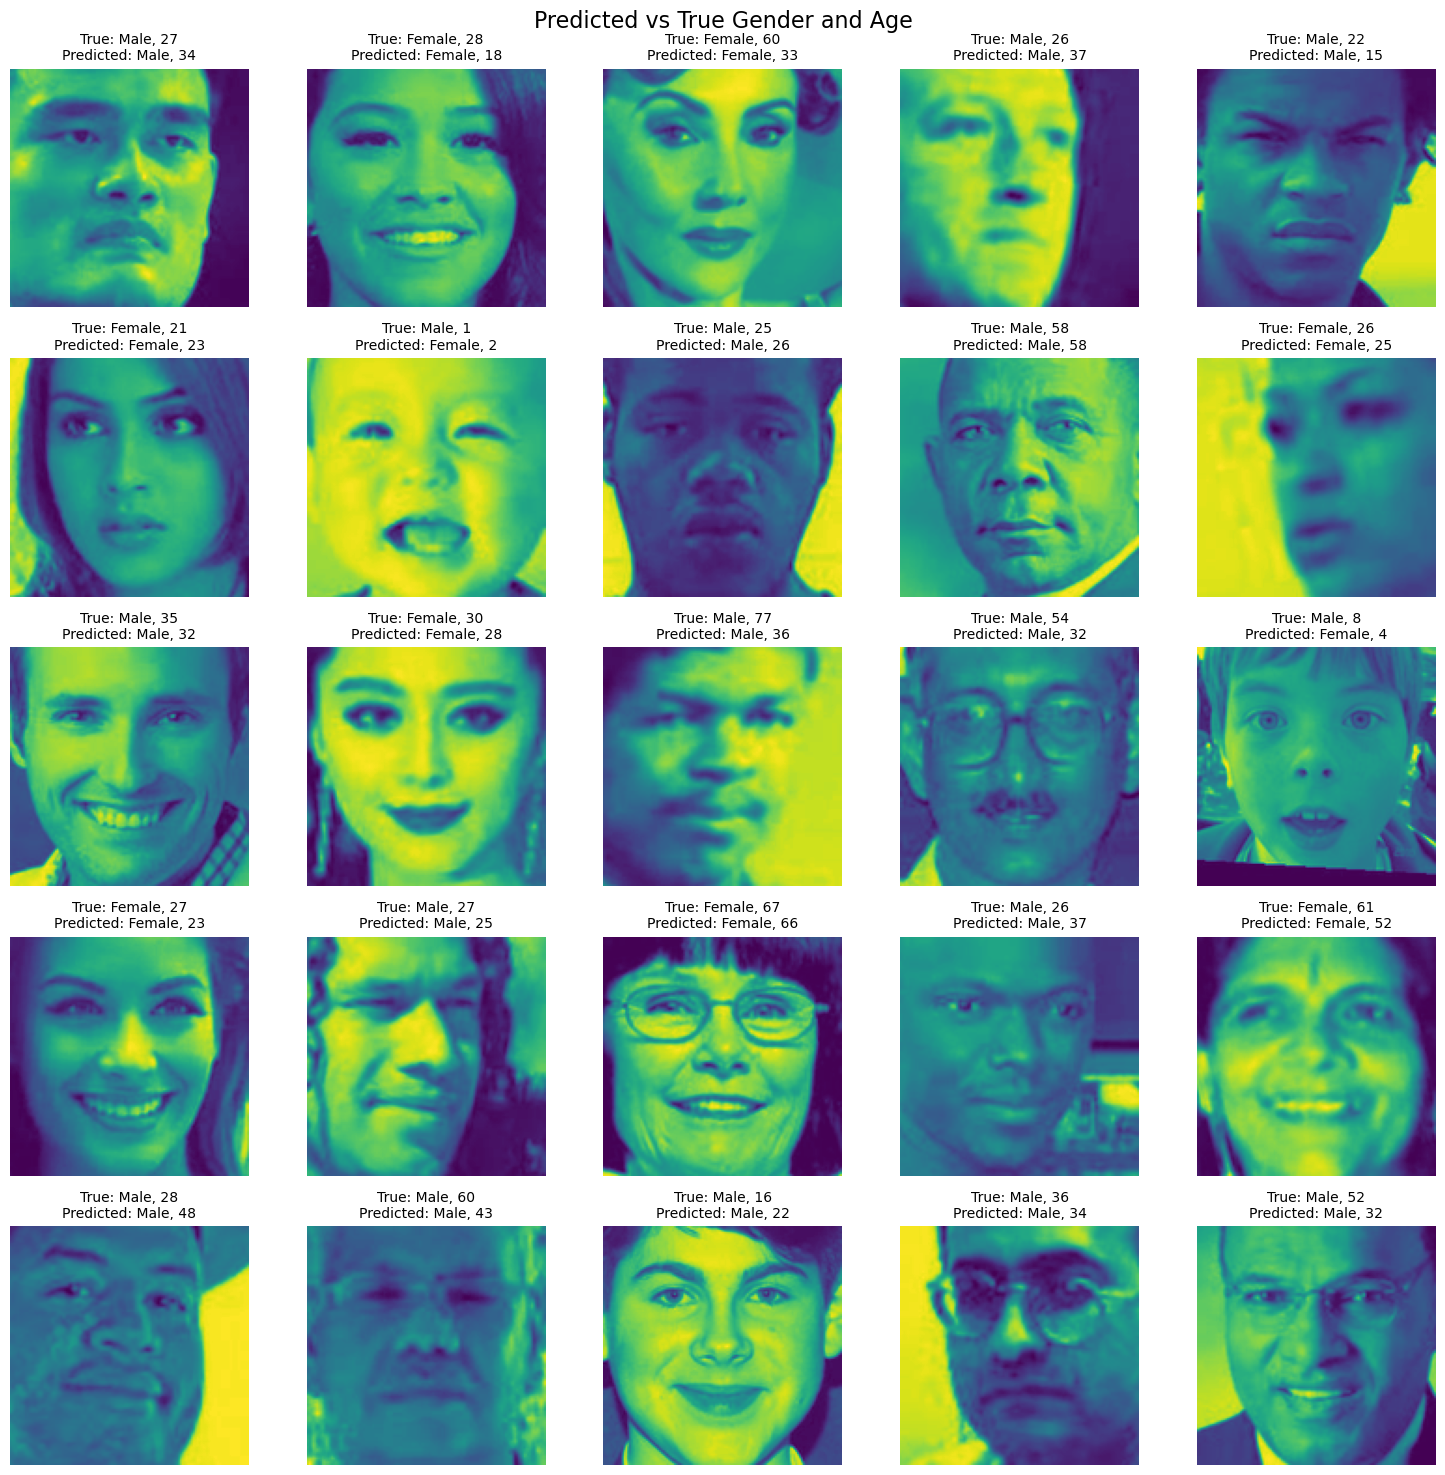

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Number of random images to display
num_images = 25  # Displaying 25 images in a 5x5 grid

# Select random indices from the test set
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)
random_images = X_test[random_indices]
random_gender_labels = y_gender_test[random_indices]
random_age_labels = y_age_test[random_indices]

# Predict gender and age for the selected images
predictions_gender, predictions_age = model1.predict(random_images)

# Assuming 'gender_mapping' is defined as before
gender_mapping = {0: 'Male', 1: 'Female'}

# Plotting images and printing details
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid with larger figure size
fig.suptitle('Predicted vs True Gender and Age', fontsize=16)

for i in range(num_images):
    predicted_gender = gender_mapping[int(np.round(predictions_gender[i][0]))]
    predicted_age = int(np.round(predictions_age[i][0]))
    true_gender = gender_mapping[int(random_gender_labels[i])]
    true_age = int(random_age_labels[i])
    
    # Print true and predicted age for each image
    print(f"Image {i+1}: True Age: {true_age}, Predicted Age: {predicted_age}")
    
    # Plot each image with true and predicted labels
    ax = axes[i // 5, i % 5]
    ax.imshow(array_to_img(random_images[i]),)
    ax.axis('off')
    ax.set_title(f'True: {true_gender}, {true_age}\nPredicted: {predicted_gender}, {predicted_age}', fontsize=10)

plt.tight_layout()
plt.show()
